# Cancer prediction case study

In [2]:
# 1. Import the required packages.

import numpy as np
import pandas as pd

In [8]:
# Read the file using panda

path = 'C:/Users/E056362/Documents/New Project/Machine Learning Class - Assignment/Cancer Case Study/cancer.csv'
CancerDF = pd.read_csv(path)

In [10]:
# Take a frist look at dataset
CancerDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                   569 non-null int64
diagnosis            569 non-null object
radius_mean          569 non-null float64
texture_mean         569 non-null float64
perimeter_mean       569 non-null float64
area_mean            569 non-null float64
smoothness_mean      569 non-null float64
compactness_mean     569 non-null float64
concavity_mean       569 non-null float64
points_mean          569 non-null float64
symmetry_mean        569 non-null float64
dimension_mean       569 non-null float64
radius_se            569 non-null float64
texture_se           569 non-null float64
perimeter_se         569 non-null float64
area_se              569 non-null float64
smoothness_se        569 non-null float64
compactness_se       569 non-null float64
concavity_se         569 non-null float64
points_se            569 non-null float64
symmetry_se          569 non-null float64
dimension_se    

Observations.

1. Dataset having total 32 columns
2. Each column as 569 --> This means there are no missing entries
3. Except Daignosis all other columns are float values

In [11]:
# Take look at values of first 5 rows
CancerDF.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [22]:
# Get the Unique values from column Diagnosis
CancerDF.diagnosis.unique()
# So there are 2 Unique values


array(['B', 'M'], dtype=object)

In [37]:
# Seperate Labels and features into Numpy array
label = CancerDF.diagnosis.values
features = CancerDF.iloc[:,2:32].values

In [44]:
# Create Test Train Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=4)

Use Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

LogModel = LogisticRegression()
LogModel.fit(X_train,y_train)
import warnings
warnings.filterwarnings('ignore')

In [49]:
# Check the Accuracy of Model
print(LogModel.score(X_train,y_train))
print(LogModel.score(X_test,y_test))

0.9582417582417583
0.9385964912280702


In [57]:
# Fine Tune the Random state of the model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
HighScore = 0
for i in range(0,401):
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=i)
    LogModel = LogisticRegression()
    LogModel.fit(X_train,y_train)
    TrainScore = LogModel.score(X_train,y_train)
    TestScore  = LogModel.score(X_test,y_test)
    if (TestScore > TrainScore):
        print('Test {} Train {} seed {}'.format(TestScore,TrainScore,i))
        if ( HighScore < TestScore):
            HighScore = TestScore
        
        
    print(HighScore)
        

0
Test 0.9824561403508771 Train 0.9538461538461539 seed 1
0.9824561403508771
Test 0.9649122807017544 Train 0.9538461538461539 seed 2
0.9824561403508771
0.9824561403508771
0.9824561403508771
0.9824561403508771
0.9824561403508771
0.9824561403508771
0.9824561403508771
Test 0.956140350877193 Train 0.9560439560439561 seed 9
0.9824561403508771
0.9824561403508771
0.9824561403508771
0.9824561403508771
0.9824561403508771
Test 0.9649122807017544 Train 0.9538461538461539 seed 14
0.9824561403508771
Test 0.9649122807017544 Train 0.9516483516483516 seed 15
0.9824561403508771
Test 0.9649122807017544 Train 0.9538461538461539 seed 16
0.9824561403508771
0.9824561403508771
0.9824561403508771
Test 0.956140350877193 Train 0.9494505494505494 seed 19
0.9824561403508771
0.9824561403508771
Test 0.9736842105263158 Train 0.9494505494505494 seed 21
0.9824561403508771
Test 0.9649122807017544 Train 0.9538461538461539 seed 22
0.9824561403508771
0.9824561403508771
0.9824561403508771
Test 0.9649122807017544 Train 0.95

1.0
1.0
Test 0.956140350877193 Train 0.9560439560439561 seed 220
1.0
1.0
1.0
1.0
Test 0.956140350877193 Train 0.9560439560439561 seed 224
1.0
1.0
1.0
1.0
1.0
1.0
Test 0.9649122807017544 Train 0.9516483516483516 seed 230
1.0
1.0
1.0
Test 0.956140350877193 Train 0.9560439560439561 seed 233
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
Test 0.9649122807017544 Train 0.945054945054945 seed 247
1.0
1.0
Test 0.9824561403508771 Train 0.9472527472527472 seed 249
1.0
Test 0.9824561403508771 Train 0.9516483516483516 seed 250
1.0
1.0
1.0
Test 0.9824561403508771 Train 0.9494505494505494 seed 253
1.0
1.0
1.0
1.0
Test 0.956140350877193 Train 0.9560439560439561 seed 257
1.0
1.0
1.0
Test 0.9649122807017544 Train 0.9538461538461539 seed 260
1.0
1.0
1.0
Test 0.9649122807017544 Train 0.9560439560439561 seed 263
1.0
1.0
Test 0.9736842105263158 Train 0.9516483516483516 seed 265
1.0
Test 0.956140350877193 Train 0.9538461538461539 seed 266
1.0
1.0
1.0
1.0
Test 0.956140350877193 Train 0.9538461538461

In [79]:
# FOr seed 155 we are getting highest test score

In [80]:
# Create Test Train Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=155)

from sklearn.linear_model import LogisticRegression

LogModel = LogisticRegression()
LogModel.fit(X_train,y_train)
import warnings
warnings.filterwarnings('ignore')
# Check the Accuracy of Model
print(LogModel.score(X_train,y_train))
print(LogModel.score(X_test,y_test))

0.9494505494505494
1.0


In [81]:
# Confusion Metrics
from sklearn.metrics import confusion_matrix 
confusion_matrix(label,LogModel.predict(features))

array([[347,  10],
       [ 13, 199]], dtype=int64)

In [82]:
from sklearn.metrics import classification_report
print(classification_report(label,LogModel.predict(features)))

              precision    recall  f1-score   support

           B       0.96      0.97      0.97       357
           M       0.95      0.94      0.95       212

   micro avg       0.96      0.96      0.96       569
   macro avg       0.96      0.96      0.96       569
weighted avg       0.96      0.96      0.96       569



In [83]:
# Quality Score = Pricision of B + Recall of M / 2 = 0.96 + 0.94 /2 = 0.95 
# So we deploy the model

In [103]:
# This is Unbalanced Dataset So we will draw PR curve for it
# Before we go ahead we need to Binarize our Lable.
# Lets check if our model supoorts either predict proba or decision functin

# Step 1: encode the labels.
from sklearn.preprocessing import label_binarize
y = label_binarize(label,classes=['B','M'])
print(y)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]


In [85]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                y,
                                                test_size=0.2,
                                                random_state=23)

In [86]:
#Create LogisticRegression OneVsRestClassifier Model
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
multiClassModel = OneVsRestClassifier(LogisticRegression())
y_score = multiClassModel.fit(X_train,y_train).decision_function(features)


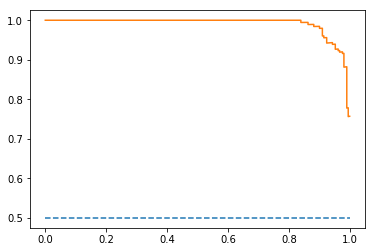

In [95]:
# Plot PR
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
precision,recall,_ = precision_recall_curve(y,y_score)
plt.figure()
plt.plot([0,1],[0.5,0.5], linestyle = '--')
plt.plot(recall,precision)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
